In [14]:
# https://github.com/maciejbalawejder/Reinforcement-Learning-Collection/blob/main/Q-Table/Qtable.ipynb
# https://www.gymlibrary.dev/environments/classic_control/cart_pole/
# https://medium.com/analytics-vidhya/q-learning-is-the-most-basic-form-of-reinforcement-learning-which-doesnt-take-advantage-of-any-8944e02570c5
import gymnasium as gym
import time
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# returns Q-table
def Qtable(state_space,action_space,bin_size = 30):
    
    bins = [np.linspace(-4.8,4.8,bin_size),
            np.linspace(-4,4,bin_size),
            np.linspace(-0.418,0.418,bin_size),
            np.linspace(-4,4,bin_size)]
    
    q_table = np.random.uniform(low=-1,high=1,size=([bin_size] * state_space + [action_space]))
    return q_table, bins

In [3]:
def Discrete(state, bins):
    index = []
    for i in range(len(state)): index.append(np.digitize(state[i],bins[i]) - 1)
    return tuple(index)

In [4]:
def Q_learning(env,q_table, bins,reward_array, episodes = 5000, gamma = 0.95, lr = 0.1, timestep = 100, epsilon = 0.2):
    
    rewards = 0
    steps = 0
    solved = 0
    for episode in range(1,episodes+1):
        steps += 1 
        # env.reset() => initial observation
        current_state = Discrete(env.reset()[0],bins)
      
        score = 0
        terminated = False
        while not terminated: 
            #if episode%timestep==0: env.render()

            # Exploration
            if np.random.uniform(0,1) < epsilon:
                # take random action
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[current_state])
            
            # Take step
            observation, reward, terminated, truncated, info  = env.step(action)
            next_state = Discrete(observation,bins)
            score+=reward
          
            #Update Q-table
            if not terminated:
                    max_future_q = np.max(q_table[next_state])
                    current_q = q_table[current_state+(action,)]
                    new_q = (1-lr)*current_q + lr*(reward + gamma*max_future_q)
                    q_table[current_state+(action,)] = new_q
            current_state = next_state
            
        # End of the loop update
        else:
            rewards += score
            reward_array.append(score)
            
            #print results
            #clear_output(wait=True)
            if score > 195 and steps >= 100: solved += 1
            print(episode, "/", episodes, "Episodes done,", str(np.round(solved/episode,4))+"% solved, score:", score)
        if episode % timestep == 0: print(reward / timestep)

In [5]:
def test(env, q_table, bins):
    # env.reset() => initial observation
    current_state = Discrete(env.reset()[0],bins)
    score = 0

    for i in range(1000):
        # take action based on q-table
        action = np.argmax(q_table[current_state])
        # take next step
        observation, reward, terminated, truncated, info  = env.step(action)
        next_state = Discrete(observation,bins)

        score+=reward
        print(score/(i+1))

        current_state = next_state

        if terminated: return

# Import

In [6]:
q_table_load = np.load("q_table_invert_pend_79k.npy")

# Training

In [22]:
train_env = gym.make("CartPole-v1")
train_env.reset()

# stats
print(train_env.action_space) # 2 actions
print(train_env.observation_space) # 4 states
# Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
# [x_min, vx_min, phi_min, vphi_min][x_max, vx_max, phi_max, vphi_max]

### Q-Table
q_table, bins = Qtable(len(train_env.observation_space.low), train_env.action_space.n)
print(q_table.shape)

### Training
reward_array = []
lr = 0.25
gamma = 0.995
episodes = 1*10**4
timestep = 1000
epsilon = 0.2

Q_learning(train_env,q_table, bins, reward_array, episodes, gamma, lr, timestep, epsilon)
train_env.close()

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
(30, 30, 30, 30, 2)
1 / 10000 Episodes done, 0.0% solved, score: 32.0
2 / 10000 Episodes done, 0.0% solved, score: 25.0
3 / 10000 Episodes done, 0.0% solved, score: 80.0
4 / 10000 Episodes done, 0.0% solved, score: 9.0
5 / 10000 Episodes done, 0.0% solved, score: 23.0
6 / 10000 Episodes done, 0.0% solved, score: 28.0
7 / 10000 Episodes done, 0.0% solved, score: 18.0
8 / 10000 Episodes done, 0.0% solved, score: 22.0
9 / 10000 Episodes done, 0.0% solved, score: 17.0
10 / 10000 Episodes done, 0.0% solved, score: 16.0
11 / 10000 Episodes done, 0.0% solved, score: 13.0
12 / 10000 Episodes done, 0.0% solved, score: 26.0
13 / 10000 Episodes done, 0.0% solved, score: 14.0
14 / 10000 Episodes done, 0.0% solved, score: 16.0
15 / 10000 Episodes done, 0.0% solved, score: 23.0
16 / 10000 Episodes done, 0.0% solved, score: 13.0
17 / 10000 Episodes d

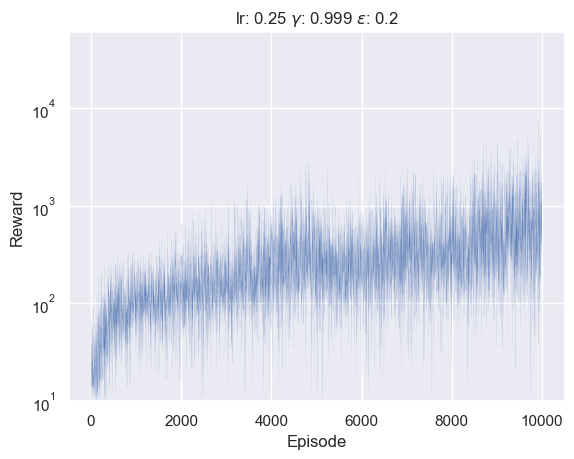

In [21]:
episode_array = np.linspace(0,len(reward_array),len(reward_array))

sns.set_theme()
fig, ax = plt.subplots(1)
fig = plt.semilogy(episode_array,reward_array, linewidth = .05)
ax.set(xlabel = "Episode", ylabel = "Reward", ylim = (10**1, 6*10**4),
       title = "lr: "+str(lr)+" $\gamma$: "+str(gamma)+" $\epsilon$: "+str(epsilon)
       );

# Export

In [ ]:
np.save("q_table_invert_pend_79k.npy", q_table)

In [9]:
q_table_load = np.load("q_table_invert_pend_79k.npy")

# Testing

In [10]:
test_env = gym.make("CartPole-v1", render_mode="human")
test_env.reset()
test(test_env,q_table_load,bins)
test_env.close()

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
